#### Objective: Perform topic modelling using LDA on Yelp POI reviews. 

##### Step 1: Load required libraries/ modeules

In [5]:
# pip install nltk

In [6]:
# pip install wordcloud

In [7]:
# import packages
import numpy as np
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
import nltk
from matplotlib import pyplot as plt

from nltk.corpus import stopwords
# Download the NLTK stop words
# nltk.download('stopwords')

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer

from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore")

##### Step 2: Read and set-up the dataset and print the details of the first blog

In [8]:
data = pd.read_csv('data/3_topicModelling/travelBlog_Exp.csv')
# Count the number of columns in the first row
num_columns = len(data.iloc[0])
print(num_columns)

6


In [9]:
# Print the first observation (first row)
first_blog = data.iloc[0]
print(first_blog)

October 3rd 2016                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

##### Step 3: Remove the stop words and convert the data into TD-IDF format

In [10]:
text_column = data.iloc[:, -1].tolist()

In [11]:
stop_words = list(stopwords.words('english'))
tfidf = TfidfVectorizer(stop_words=stop_words)

In [12]:
tfidf_matrix = tfidf.fit_transform(text_column)
tfidf_matrix

<99x9754 sparse matrix of type '<class 'numpy.float64'>'
	with 30320 stored elements in Compressed Sparse Row format>

##### Step 4: Implement LDA

###### a: Iterate from 5 to 25, with a step of 5, to find a good value of “k” for LDA; and plot a graph showing the number of topics against perplexity for each ‘k’ value

In [13]:
perplexity_values = []
k_values = range(5, 25, 5)

for k in k_values:
    lda = LatentDirichletAllocation(n_components=k, random_state=123)
    lda.fit(tfidf_matrix)
    perplexity = lda.perplexity(tfidf_matrix)
    perplexity_values.append(perplexity)

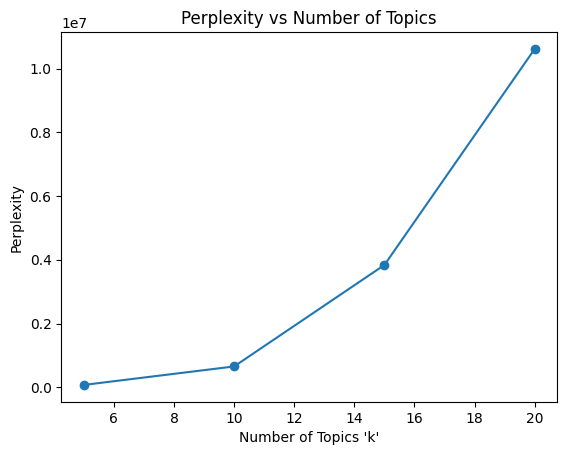

In [14]:
plt.plot(k_values, perplexity_values, marker='o', linestyle='-')
plt.xlabel('Number of Topics \'k\'')
plt.ylabel('Perplexity')
plt.title('Perplexity vs Number of Topics')
plt.show()

###### b: Run LDA with k=20 and save the document topic distribution list for the same.
Using that list, for any one blog, plot bar graph showing the topic distribution for that blog and identify the dominant topic for that blog.

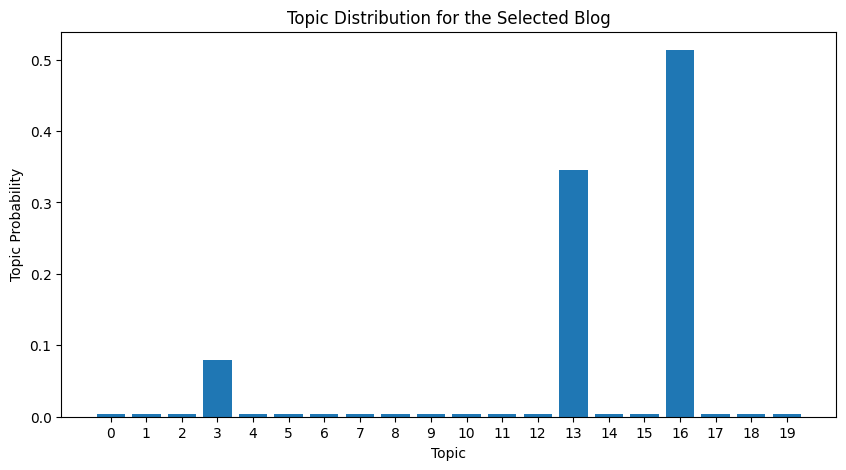

Dominant Topic for the Selected Blog: Topic 16


In [15]:
# Train LDA with k=20 topics
k = 20
lda = LatentDirichletAllocation(n_components=k, random_state=123)
lda.fit(tfidf_matrix)

# Save the document topic distribution
document_topics = lda.transform(tfidf_matrix)

# Select a specific blog (the first blog printed earlier)
blog_index = 0
blog_topic_distribution = document_topics[blog_index]

# Create a bar graph to visualize the topic distribution for the selected blog
plt.figure(figsize=(10, 5))
plt.bar(range(k), blog_topic_distribution, align='center')
plt.xlabel('Topic')
plt.ylabel('Topic Probability')
plt.title('Topic Distribution for the Selected Blog')
plt.xticks(range(k))
plt.show()

# Identify the dominant topic
dominant_topic = np.argmax(blog_topic_distribution)
print(f'Dominant Topic for the Selected Blog: Topic {dominant_topic}')


##### Step 5: Finally, explore the topic identified in the previous task and investigate the frequency of terms in that topic.
Retrieve the top 20 words and their probabilities from that topic, and use this to create a word-cloud to identify the most “important” term within that topic. 

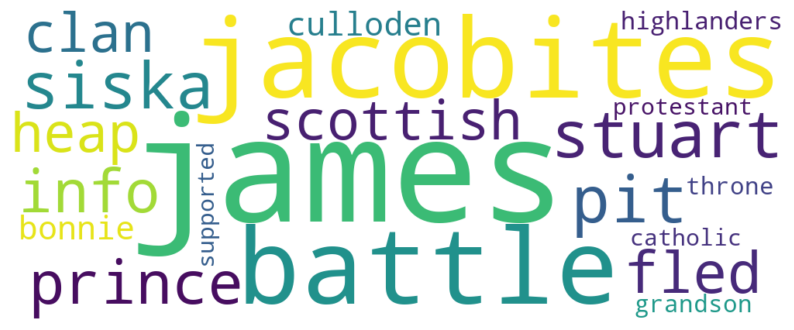

In [16]:
# Word probabilities for the dominant topic
topic_word_probabilities = lda.components_[dominant_topic]

# Feature names from the TF-IDF vectorizer
feature_names = tfidf.get_feature_names_out()

# Sort words by their probabilities and select the top 20 words
top_words_indices = topic_word_probabilities.argsort()[:-20 - 1:-1]
top_words = [feature_names[i] for i in top_words_indices]
top_word_probabilities = topic_word_probabilities[top_words_indices]

# Create a dictionary of words and their probabilities
word_probabilities_dict = dict(zip(top_words, top_word_probabilities))

# Create a word cloud
wordcloud = WordCloud(width=1000, height=400, background_color='white').generate_from_frequencies(word_probabilities_dict)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
#plt.title(f'Top 20 Words in Dominant Topic (Topic {dominant_topic})')
plt.show()